In [1]:
#importing data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
PATH='~/Downloads/Upgrad/Investment Assignment/Data Files'
pd.set_option('display.precision',12)
pd.set_option('display.float_format', '{:.2f}'.format)

## CHECKPOINT 1

In [2]:
#Loading datasets in rounds2 and companies df

rounds2 = pd.read_csv(PATH+'/rounds2.csv',encoding = "ISO-8859-1")
companies = pd.read_csv(PATH+'/companies.txt',sep="\t",encoding = "ISO-8859-1")
#chardet

In [3]:
#Checking the head() of rounds2

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [4]:
#Checking head() for companies

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
#Changing the encoding to ASCII for 2 columns in Companies df(permalink,name) and rounds2 df(company_permalink)

companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [6]:
#Changing the columns to lower case to have to have uniformity in data

rounds2.company_permalink=[i.lower() for i in rounds2.company_permalink]
companies.permalink=[i.lower() for i in companies.permalink]

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
#1.1.1 and 1.1.2
#Printing unique values of companies in rounds2 and companies df

print(rounds2.company_permalink.nunique())
print(companies.permalink.nunique())

66368
66368


<h4>
1.1.1 Printing unique values of companies in rounds2  
Ans. 66368  
<br/>
1.1.2 Printing unique values of companies in companies df  
Ans. 66368  
<br />
1.1.3 In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.  
Ans. permalink  
</h4>

In [10]:
#1.1.4
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

set(companies['permalink']).difference(set(rounds2['company_permalink']))

set()

<h4>
1.1.4 Are there any companies in the rounds2 file which are not  present in companies ? <br />
Ans. No 
</h4>

In [11]:
#Merging the rounds2 table with companies using inner join and naming the new dataframe as master_frame

master_frame=rounds2.merge(companies,how='inner',left_on='company_permalink',right_on='permalink')

In [12]:
#1.1.5
#Finding the number of columns in master_frame df

len(master_frame.index)

114949

<h4>
1.1.5 Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?  
<br />  
Ans. 114949  
</h4>

### Cleaning the data to remove/impute null values

In [13]:
#Checking the columns of master_frame

master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [14]:
#Checking the head of the master_frame

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


<h3>Removing columns we will not need during the exercise</h3>
<h4>
1.funding_round_permalink  
<br/>
2.funding_round_code  
<br/>
3.permalink  
<br/>
4.homepage_url  
<br/>
5.state_code  
<br/>
6.region  
<br/>
7.city  
<br/>
8.founded_at  
<br/>
</h>

In [15]:
#Using drop() function to drop the columns

master_frame.drop(['funding_round_permalink','funding_round_code', 'permalink', 'homepage_url','state_code', 'region', 'city', 'founded_at'],axis=1,inplace=True)


In [16]:
#Finding percentage of data which is empty in columns

master_frame.isna().sum()/len(master_frame.index)*100


company_permalink     0.00
funding_round_type    0.00
funded_at             0.00
raised_amount_usd    17.39
name                  0.00
category_list         2.97
status                0.00
country_code          7.55
dtype: float64

## CHECKPOINT 2

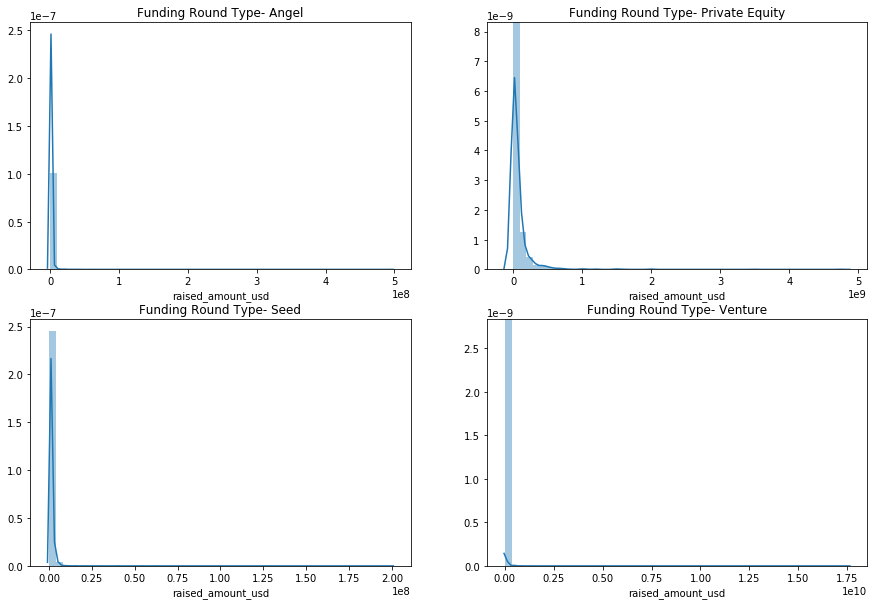

In [17]:
#Since we have to find a central tendency here, we will ignore the missing values in our calculation for part 2

plt.figure(figsize=(15,10))
plt.subplot(221,title='Funding Round Type- Angel')
sns.distplot(master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd.dropna())
plt.subplot(222,title='Funding Round Type- Private Equity')
sns.distplot(master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd.dropna())
plt.subplot(223,title='Funding Round Type- Seed')
sns.distplot(master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd.dropna())
plt.subplot(224,title='Funding Round Type- Venture')
sns.distplot(master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.dropna())

#### As we can see that data is skewed to the left for all of Funding type, we will use Median as representative value

In [18]:
#Finding the Median value for the four Funding type using groupby feature
pd.DataFrame(master_frame[master_frame['funding_round_type'].isin(['angel','seed','venture','private_equity'])].groupby('funding_round_type').raised_amount_usd.median())


,raised_amount_usd
funding_round_type,
angel,400000.00
private_equity,20000000.00
seed,275000.00
venture,5000000.00


In [19]:
#Finding the Median value for the four Funding type using groupby feature
pd.DataFrame(master_frame[master_frame['funding_round_type'].isin(['angel','seed','venture','private_equity'])].groupby('funding_round_type').raised_amount_usd.mean())


,raised_amount_usd
funding_round_type,
angel,958694.47
private_equity,73308593.03
seed,719818.00
venture,11748949.13


<h3>2.1 Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1  
<br/>
1. Angel : 4 Lakhs  
<br/>
2. Private Equity :200 Lakhs  
<br/>
3. Seed : 2.75 Lakhs  
<br/>
4. Venture : 50 Lakhs  
<br/>
</h3>
# As Spark Funds wants to invest between 5 to 15 million USD per investment round, we only have Venture Funding type which seems to be the most suitable for the company as per their requirements.


In [20]:
"""As we can see that only Venture funding lies between our expected investment type, we will filter our data only 
to include Venture type"""
#Creating a copy of master Frame to draw graphs
master_frame_graph = pd.DataFrame(master_frame[master_frame['funding_round_type'].isin(['angel','seed','venture','private_equity'])])
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')]

In [21]:
#We will drop the Funding Round type since we have only one unique value after removing other values
master_frame.drop('funding_round_type',axis=1,inplace=True)

In [22]:
master_frame.head()

,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,05-01-2015,10000000.00,#fame,Media,operating,IND
1,/organization/-qounter,14-10-2014,nan,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN
5,/organization/004-technologies,24-07-2014,nan,004 Technologies,Software,operating,USA


In [23]:
#Checking the number of columns
len(master_frame.index)

55494

In [24]:
# Checking the missing values percentage for the columns
master_frame.isna().sum()/len(master_frame.index)*100

company_permalink   0.00
funded_at           0.00
raised_amount_usd   9.49
name                0.00
category_list       2.04
status              0.00
country_code        5.18
dtype: float64

In [25]:
print("Mean of raised_amount_usd {:.2f}".format(master_frame.raised_amount_usd.mean()))
print("Median of raised_amount_usd {:.2f}".format(master_frame.raised_amount_usd.median()))

Mean of raised_amount_usd 11748949.13
Median of raised_amount_usd 5000000.00


#### Since, the difference between mean and median for raised_amount_usd is very high and missing values are less than 10%, it is not going to impact our analysis a lot, if we drop them. So, dropping the rows with missing values.

In [26]:
#Lets drop the missing values from the Master_frame
master_frame.dropna(inplace=True)

In [27]:
#Checking the number of columns again after the values are dropped
len(master_frame.index)

47809

In [28]:
# Validating if there are no more missing values
master_frame.isna().sum()/len(master_frame.index)*100

company_permalink   0.00
funded_at           0.00
raised_amount_usd   0.00
name                0.00
category_list       0.00
status              0.00
country_code        0.00
dtype: float64

## CHECKPOINT 3

### Finding the top 9 countries which have the highest funding for Venture FT

In [29]:
#Checkpoint 3
#Using groupby countries and then funding the sum of raised amount in USD, sorting them and finding the top 9 countries 
top9=pd.DataFrame(master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).head(9))
top9

,raised_amount_usd
country_code,
USA,420068029342.00
CHN,39338918773.00
GBR,20072813004.00
IND,14261508718.00
CAN,9482217668.00
FRA,7226851352.00
ISR,6854350477.00
DEU,6306921981.00
JPN,3167647127.00


#### We can see that the top 9 countries on the basis of Raised amount in USD as per Sparks Funds requirement.
#### The top 3 English speaking countries includes USA, GBR and IND(CHN does not have English as one of the official language)

## CHECKPOINT 4

In [30]:
#Reading the Mapping file into mapping df
mapping=pd.read_csv('mapping.csv')

In [31]:
#Checking the shape of mapping df
mapping.shape

(688, 10)

In [32]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [33]:
'''While working on the dataset, there was some data issues in it where na was written as 0, so replacing 0 with na 
 and capitalizing the field to have uniform data in the Category_list column'''

mapping['category_list']=mapping['category_list'].str.replace('0','na').str.capitalize()
master_frame.category_list=master_frame['category_list'].str.capitalize()

In [34]:
'''Creating a new column Primary sector business as per the business rule that the first string before the vertical 
bar will be considered the primary sector '''

master_frame['Primary_Sector']=master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [35]:
#Checking the head of the dataset after adding the Primary_Sector column
master_frame.reset_index(inplace=True,drop=True)
master_frame.head()

,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector
0,/organization/-fame,05-01-2015,10000000.00,#fame,Media,operating,IND,Media
1,/organization/0-6-com,19-03-2008,2000000.00,0-6.com,Curated web,operating,CHN,Curated web
2,/organization/0ndine-biomedical-inc,21-12-2009,719491.00,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
3,/organization/0xdata,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,Analytics
4,/organization/0xdata,03-01-2013,1700000.00,H2O.ai,Analytics,operating,USA,Analytics


In [36]:
#Function to deshape the mapping df
def mapping_func(df):
    if df['Automotive & Sports']==1:
        return 'Automotive & Sports'
    elif df['Cleantech / Semiconductors']==1:
        return 'Cleantech / Semiconductors'
    elif df['Entertainment']==1:
        return 'Entertainment'
    elif df['Health']==1:
        return 'Health'
    elif df['Manufacturing']==1:
        return 'Manufacturing'
    elif df['News, Search and Messaging']==1:
        return 'News, Search and Messaging'
    elif df['Others']==1:
        return 'Others'
    elif df['Social, Finance, Analytics, Advertising']==1:
        return 'Social, Finance, Analytics, Advertising'
    else:
        return 'Blanks'

In [37]:
#Creating a new column 'Main Sector' with the value as the name of the Category
mapping['Main_Sector']=mapping.apply(lambda x: mapping_func(x),axis=1)

#Dropping other columns now that we have just one column with name of Main Sector
mapping.drop(['Automotive & Sports', 'Blanks','Cleantech / Semiconductors', 'Entertainment', 'Health','Manufacturing', 'News, Search and Messaging', 'Others','Social, Finance, Analytics, Advertising'],axis=1,inplace=True)
mapping = mapping.rename(columns = {"category_list":"Primary_Sector"})

In [38]:
#Checking the head of the df after reshaping the mapping df
mapping.head(5)

,Primary_Sector,Main_Sector
0,NaN,Blanks
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [39]:
#Merging master_frame with the mapping dataframe using inner join

master_frame=master_frame.merge(mapping,how='inner',on='Primary_Sector')

In [40]:
#Checking the head of the df after the merge operation

master_frame.head()

,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector,Main_Sector
0,/organization/-fame,05-01-2015,10000000.00,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,06-10-2015,15000000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment
2,/organization/90min,07-05-2013,5800000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment
3,/organization/90min,26-03-2014,18000000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,06-08-2014,5000000.00,All Def Digital,Media,operating,USA,Media,Entertainment


## CHECKPOINT 4

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

1. All the columns of the master_frame along with the primary sector and the main sector

2. The total number (or count) of investments for each main sector in a separate column

3. The total amount invested in each main sector in a separate column

In [41]:
#Creating Dataframe D1 with country as USA

#Step 1 : Selecting only data from USA and with Raised amount between 5-15 Million
D1=master_frame[(master_frame['country_code']=='USA') & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000)]

#Step 2: Creating another DF for SUM and count of total investments
D1_new = D1[['raised_amount_usd','Main_Sector']].groupby('Main_Sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount_in_Sector','count' : 'Total_count_in_Sector'})
D1_new.columns=D1_new.columns.get_level_values(1)

#Step 3: Merging both the dataframes for our resultant output
D1=D1.merge(D1_new,how='inner',left_on='Main_Sector', right_index=True)

D1.head()


,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector,Main_Sector,Total_amount_in_Sector,Total_count_in_Sector
4,/organization/all-def-digital,06-08-2014,5000000.00,All Def Digital,Media,operating,USA,Media,Entertainment,5099197982.00,591
16,/organization/chefs-feed,26-02-2015,5000000.00,ChefsFeed,Media|mobile|restaurants|technology,operating,USA,Media,Entertainment,5099197982.00,591
24,/organization/huffingtonpost,01-08-2006,5000000.00,The Huffington Post,Media|news|publishing,acquired,USA,Media,Entertainment,5099197982.00,591
25,/organization/huffingtonpost,01-09-2007,5000000.00,The Huffington Post,Media|news|publishing,acquired,USA,Media,Entertainment,5099197982.00,591
33,/organization/matchmine,01-09-2007,10000000.00,MatchMine,Media|news|reviews and recommendations,closed,USA,Media,Entertainment,5099197982.00,591


In [42]:
#Creating Dataframe D2 with country as GBR
#Step 1 : Selecting only data from GBR and with Raised amount between 5-15 Million
D2=master_frame[(master_frame['country_code']=='GBR') & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000)]

#Step 2: Creating another DF for SUM and count of total investments
D2_new = D2[['raised_amount_usd','Main_Sector']].groupby('Main_Sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount_in_Sector','count' : 'Total_count_in_Sector'})
D2_new.columns=D2_new.columns.get_level_values(1)
#Step 3: Merging both the dataframes for our resultant output
D2=D2.merge(D2_new,how='inner',on='Main_Sector',right_index=True)

D2.head()

,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector,Main_Sector,Total_amount_in_Sector,Total_count_in_Sector
1,/organization/90min,06-10-2015,15000000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment,482784687.00,56
2,/organization/90min,07-05-2013,5800000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment,482784687.00,56
10775,/organization/eutechnyx,13-05-2010,8800000.00,Eutechnyx,Games,operating,GBR,Games,Entertainment,482784687.00,56
11065,/organization/mind-candy,01-06-2011,10000000.00,Mind Candy,Games,operating,GBR,Games,Entertainment,482784687.00,56
11066,/organization/mind-candy,23-11-2006,10860000.00,Mind Candy,Games,operating,GBR,Games,Entertainment,482784687.00,56


In [43]:
#Creating Dataframe D3
#Step 1 : Selecting only data from IND and with Raised amount between 5-15 Million
D3=master_frame[(master_frame['country_code']=='IND') & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000)]

#Step 2: Creating another DF for SUM and count of total investments
D3_new = D3[['raised_amount_usd','Main_Sector']].groupby('Main_Sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount_in_Sector','count' : 'Total_count_in_Sector'})
D3_new.columns=D3_new.columns.get_level_values(1)
#Step 3: Merging both the dataframes for our resultant output
D3=D3.merge(D3_new,how='inner',on='Main_Sector',right_index=True)

D3.head()


,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector,Main_Sector,Total_amount_in_Sector,Total_count_in_Sector
0,/organization/-fame,05-01-2015,10000000.00,#fame,Media,operating,IND,Media,Entertainment,280830000.00,33
10728,/organization/dhruva,27-11-2006,5000000.00,Dhruva,Games,operating,IND,Games,Entertainment,280830000.00,33
10850,/organization/games2win,29-03-2007,5000000.00,Games2Win,Games,operating,IND,Games,Entertainment,280830000.00,33
10852,/organization/games2win,30-03-2011,6000000.00,Games2Win,Games,operating,IND,Games,Entertainment,280830000.00,33
11201,/organization/pokkt,03-11-2015,5000000.00,POKKT,Games,operating,IND,Games,Entertainment,280830000.00,33


In [44]:
#Checkpoint 4 
# 5.1.1
print(len(D1))
print(len(D2))
print(len(D3))

12063
621
328


<h3> 5.1.1 Total number of investments (count): </h3> 
<h4>
USA : 12063  
<br/>
GBR : 621  
<br/>
IND : 328  
</h4>

In [45]:
#Checkpoint 4 
# 5.1.2 (in million, so diving by 10Lakhs)
print(round(D1.raised_amount_usd.sum()/1000000,2))
print(round(D2.raised_amount_usd.sum()/1000000,2))
print(round(D3.raised_amount_usd.sum()/1000000,2))

107757.1
5379.08
2949.54


<h3>5.1.2 Total amount of investment (USD Million):  </h3>
<h4>
USA : 107757.1  
<br/>
GBR : 5379.08  
<br/>
IND : 2949.54  
</h4>

In [46]:
#Checkpoint 4 
# 5.1.3-5.1.8(USA)

D1_new.sort_values('Total_count_in_Sector',ascending=False).head(3)

,Total_amount_in_Sector,Total_count_in_Sector
Main_Sector,,
Others,26321007002.00,2950
"Social, Finance, Analytics, Advertising",23807376964.00,2714
Cleantech / Semiconductors,21633430822.00,2350


<h3> USA  </h3>
<h5>
5.1.3 Top sector (based on count of investments):  Others  
<br/>
5.1.4 Second-best sector (based on count of investments):  Social, Finance, Analytics, Advertising  
<br/>
5.1.5 Third-best sector (based on count of investments):  Cleantech / Semiconductors  
<br/>
5.1.6 Number of investments in the top sector (refer to point 3): 2950  
<br/>
5.1.7 Number of investments in the second-best sector (refer to point 4): 2714  
<br/>
5.1.8 Number of investments in the third-best sector (refer to point 5): 2350  
<br/>
</h5>

In [47]:
#Checkpoint 4 
# 5.1.3-5.1.8(GBR)

D2_new.sort_values('Total_count_in_Sector',ascending=False).head(3)

,Total_amount_in_Sector,Total_count_in_Sector
Main_Sector,,
Others,1283624289.00,147
"Social, Finance, Analytics, Advertising",1089404014.00,133
Cleantech / Semiconductors,1163990056.00,130


<h3> Great Britain </h3>
<h5>
5.1.3 Top sector (based on count of investments):  Others  
<br/>
5.1.4 Second-best sector (based on count of investments):  Social, Finance, Analytics, Advertising  
<br/>
5.1.5 Third-best sector (based on count of investments):  Cleantech / Semiconductors  
<br/>
5.1.6 Number of investments in the top sector (refer to point 3): 147  
<br/>
5.1.7 Number of investments in the second-best sector (refer to point 4): 133  
<br/>
5.1.8 Number of investments in the third-best sector (refer to point 5): 130  
<br/>
</h5>

In [48]:
#Checkpoint 4 
# 5.1.3-5.1.8(IND)

D3_new.sort_values('Total_count_in_Sector',ascending=False).head(3)['Total_amount_in_Sector']/1000000


Main_Sector
Others                                    1013.41
Social, Finance, Analytics, Advertising    550.55
News, Search and Messaging                 433.83
Name: Total_amount_in_Sector, dtype: float64

<h3> INDIA  </h3>
<h5>5.1.3 Top sector (based on count of investments): Others  
<br/>
5.1.4 Second-best sector (based on count of investments): Social, Finance, Analytics, Advertising  
<br/>
5.1.5 Third-best sector (based on count of investments): News, Search and Messaging  
<br/>
5.1.6 Number of investments in the top sector (refer to point 3): 110  
<br/>
5.1.7 Number of investments in the second-best sector (refer to point 4): 60  
<br/>
5.1.8 Number of investments in the third-best sector (refer to point 5): 52  
<br/>
</h5>

In [49]:
#Checkpoint 4 
# 5.1.9
#For the top sector count-wise (point 3), which company received the highest investment?

#Finding for USA - Others Sector
display(D1[(D1.Main_Sector=='Others')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1).index.values[0])

#Finding for GBR - Others Sector
display(D2[(D2.Main_Sector=='Others')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1).index.values[0])

#Finding for IND - Cleantech / Semiconductors Sector
display(D3[(D3.Main_Sector=='Others')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1).index.values[0])




'Virtustream'

'Electric Cloud'

'FirstCry.com'

<h3>5.1.9 For the top sector count-wise (point 3), which company received the highest investment? </h3>
<h5>
USA : Virtustream  
<br/>
GBR : Electric Cloud  
<br/>
IND : FirstCry.com  
</h5>

In [50]:
#Checkpoint 4 
# 5.1.10

print(D1[(D1.Main_Sector=='Social, Finance, Analytics, Advertising')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1).index.values[0])
print(D2[(D2.Main_Sector=='Social, Finance, Analytics, Advertising')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1).index.values[0])
print(D3[(D3.Main_Sector=='Social, Finance, Analytics, Advertising')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1).index.values[0])



SST Inc. (Formerly ShotSpotter)
Celltick Technologies
Manthan Systems


<h3>5.1.10 For the top sector count-wise (point 3), which company received the highest investment? </h3>
<h5>
USA : SST Inc. (Formerly ShotSpotter)  
<br/>
GBR : Celltick Technologies  
<br/>
IND : Manthan Systems  
</h5>

## CHECKPOINT 6

In [51]:
master_frame.head()

,company_permalink,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector,Main_Sector
0,/organization/-fame,05-01-2015,10000000.00,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,06-10-2015,15000000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment
2,/organization/90min,07-05-2013,5800000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment
3,/organization/90min,26-03-2014,18000000.00,90min,Media|news|publishing|soccer|sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,06-08-2014,5000000.00,All Def Digital,Media,operating,USA,Media,Entertainment


In [52]:
#Dividing by 10,00,000 to convert data into million
master_frame_graph['raised_amount_usd']=master_frame_graph['raised_amount_usd']/1000000
top9['raised_amount_usd']=top9['raised_amount_usd']/1000000
data_pie_chart=master_frame_graph.groupby('funding_round_type').raised_amount_usd.sum()

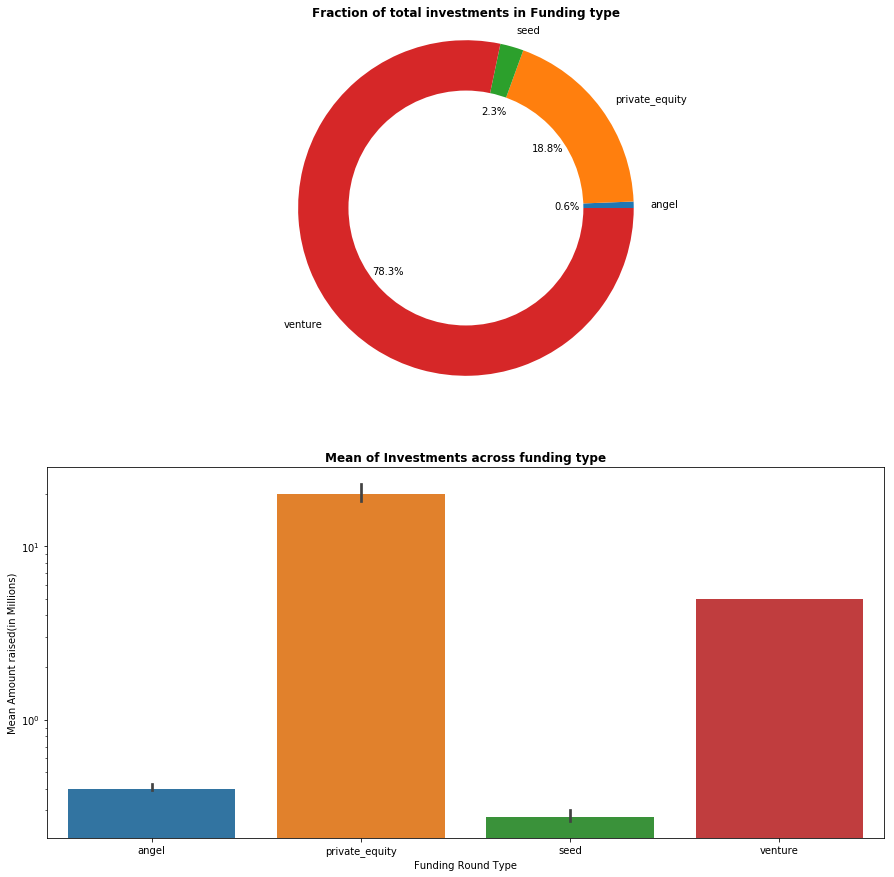

In [53]:
#6.1 A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
#Creating a Pie chart to show the fraction of each funding type
plt.figure(figsize=(15,15))
chart1=plt.subplot(211)
plt.title('Fraction of total investments in Funding type',fontweight='bold')
chart1.pie(data_pie_chart.values,labels=data_pie_chart.index,autopct='%2.1f%%')
chart1.axis('equal')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


#Plotting in Log scale to better identify the top Funding type
#Creating a barchart to show average of each funding type
plt.subplot(212)
plt.title('Mean of Investments across funding type',fontweight='bold')
chart2=sns.barplot('funding_round_type','raised_amount_usd',data=master_frame_graph,estimator=np.median, order=data_pie_chart.index)
chart2.set(xlabel='Funding Round Type', ylabel='Mean Amount raised(in Millions)',yscale='log')
plt.show()

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

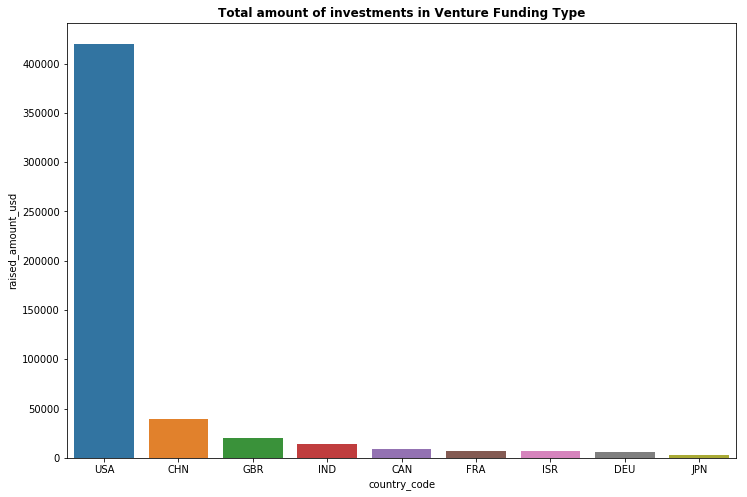

In [62]:
#6.2 A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
#Plotting in Log scale to better identify the top countries
plt.figure(figsize=(12,8))
plt.title('Total amount of investments in Venture Funding Type', fontweight='bold')
chart3=sns.barplot(x=top9.index,y=top9['raised_amount_usd'])
#chart3.set(xlabel='Country',ylabel='Raised amount in USD(Million)',yscale='log')
plt.show()

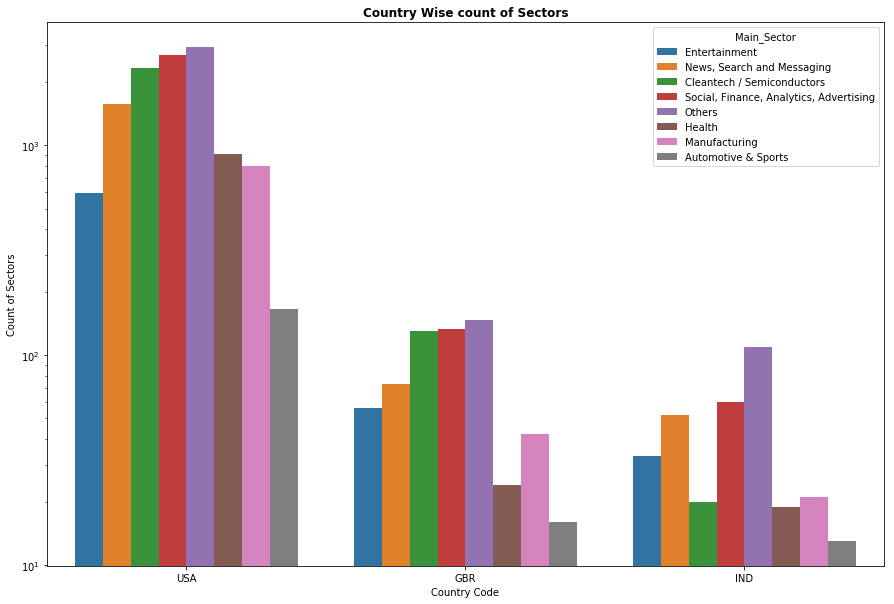

In [55]:
#6.3 A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 
#Plotting in Log scale to better identify the top Sectors
D=pd.concat([D1,D2,D3])
plt.figure(figsize=(15,10))
plt.title('Country Wise count of Sectors' , fontweight='bold')
chart4=sns.barplot(x=D['country_code'],y=D['raised_amount_usd'],hue=D['Main_Sector'],estimator=len)
chart4.set(xlabel='Country Code', ylabel='Count of Sectors',yscale='log')
plt.show()

In [56]:
D2.columns

Index(['company_permalink', 'funded_at', 'raised_amount_usd', 'name',
       'category_list', 'status', 'country_code', 'Primary_Sector',
       'Main_Sector', 'Total_amount_in_Sector', 'Total_count_in_Sector'],
      dtype='object')

In [58]:
D2.company_permalink.nunique()

500

In [59]:
len(D2)

621